# Pytorch basics

<center><a href="https://pytorch.org/">
    <img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width="300"></a></center>
    
In this first script, we see the basics of Pytorch for manipulating tensors.

Remember to check the [official documentation](https://pytorch.org/docs/stable/index.html), which is frequently used in these labs.

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

## Creating tensors

A [tensor](https://en.wikipedia.org/wiki/Tensor) is a multi-dimensional array (just like numpy arrays), which can store any structured numerical data. A 0D-tensor is just a scalar number, a 1D-tensor is a vector, a 2D-tensor is a matrix, a 3D-tensor is a "cube", etc.

<center><a href="https://medium.com/@anoorasfatima/10-most-common-maths-operation-with-pytorchs-tensor-70a491d8cafd">
    <img src="https://miro.medium.com/max/1308/1*8jdzMrA33Leu3j3F6A8a3w.png" width="400"></a></center>

In [2]:
# Reminder of numpy
x = np.zeros((1, 5)) # create a 2D array (of shape 1x5) filled with 0
print(x)
x = np.ones((1, 5)) # create a 2D array (of shape 1x5) filled with 1
print(x)
x = np.array([[1, 2], [3, 4]]) # create an array with specified values
print(x)
print(x.shape, x.shape[0], x.shape[1]) # get the shape of an array
x = np.random.randn(4, 5) # create an array with numbers drawn from a standard normal distribution
print(x)

[[0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]]
[[1 2]
 [3 4]]
(2, 2) 2 2
[[-0.05273869  1.0455339  -0.5843929  -0.80805748  0.36126024]
 [-1.52659303  0.05955381 -0.53456604 -0.57823933 -0.81769541]
 [-0.24851623  0.34462072 -0.64401856  0.98785768  1.12744128]
 [ 0.44640441 -1.24600413 -1.62175672 -0.2209149  -1.707666  ]]


In [3]:
# TO DO: create the same tensors in pytorch
# hint: use 'torch' instead of 'np', the functions are similar
x = torch.zeros((1, 5))
print(x)
x = torch.ones((1, 5))
print(x)
x = torch.tensor([[1, 2], [3, 4]])
print(x)
print(x.shape, x.shape[0], x.shape[1])
x = torch.randn(4, 5)
print(x)


tensor([[0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1.]])
tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2]) 2 2
tensor([[ 0.3703,  0.2568, -0.8294, -1.6274,  0.1492],
        [ 0.0294, -0.3634,  0.5299,  0.0070, -0.5363],
        [ 1.3196, -0.3296,  0.9376,  0.4557, -0.5808],
        [ 1.3996,  1.1523, -1.5772, -0.2293,  0.0737]])


In [4]:
# Numpy Bridge: it's also possible to directly transform numpy arrays into pytorch tensor
x_np = np.ones((2,3))
print(x_np)
x_pt = torch.from_numpy(x_np)
print(x_pt)

# And conversely:
x_np = x_pt.numpy()
print(x_np)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
[[1. 1. 1.]
 [1. 1. 1.]]


In [5]:
# Another way to create a tensor filled with a given value
x = torch.zeros((1, 5))
x.fill_(20)
print(x)

tensor([[20., 20., 20., 20., 20.]])


In [6]:
# With some functions, you can create an array without explicitly providing the shape (but instead use another tensor)
y = torch.randn_like(x)
print(y)
print(y.shape, x.shape)

tensor([[-1.1902,  0.0670, -0.2118, -2.0085, -0.3942]])
torch.Size([1, 5]) torch.Size([1, 5])


In [7]:
# TO DO:
# - create a tensor x0 that has the same size of x and filled with 0
x0 = torch.zeros_like(x)
# - create a tensor x1 that has the same size of x and filled with 1
y0 = torch.ones_like(x)

print(x0)
print(y0)


tensor([[0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1.]])


In [8]:
# Create an array of numbers from 'ind_beg' to 'ind_end' with an increment of 'inc_step'
ind_beg = 3
ind_end = 10
inc_step = 2
x = torch.arange(ind_beg, ind_end, inc_step)
print(x)

# Default values are 'ind_beg=0' and 'inc_step=1': 
x = torch.arange(ind_end)
print(x)

tensor([3, 5, 7, 9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## Basic loops

In [9]:
# The most simple 'for' loop
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [10]:
# You can also directly iterate over the elements of a 1D-tensor (or list) 
my_list = torch.randn(10)
print(my_list)
for x in my_list:
    print(x)

tensor([-0.9214,  0.6175, -1.7736, -1.8679,  0.2412,  0.3408, -0.3008, -0.3480,
         0.0223, -0.6104])
tensor(-0.9214)
tensor(0.6175)
tensor(-1.7736)
tensor(-1.8679)
tensor(0.2412)
tensor(0.3408)
tensor(-0.3008)
tensor(-0.3480)
tensor(0.0223)
tensor(-0.6104)


In [11]:
# If you use 'enumerate', you can keep track of the index
for i, x in enumerate(my_list):
    print(i, x)

0 tensor(-0.9214)
1 tensor(0.6175)
2 tensor(-1.7736)
3 tensor(-1.8679)
4 tensor(0.2412)
5 tensor(0.3408)
6 tensor(-0.3008)
7 tensor(-0.3480)
8 tensor(0.0223)
9 tensor(-0.6104)


torch.Size([16, 16])


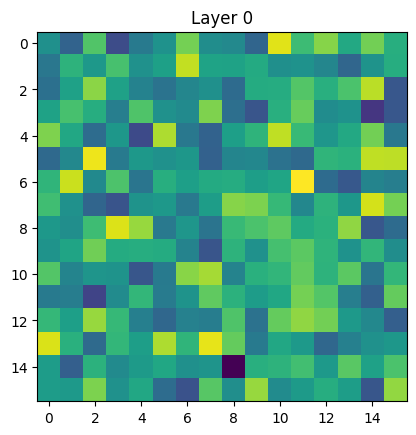

torch.Size([16, 16])


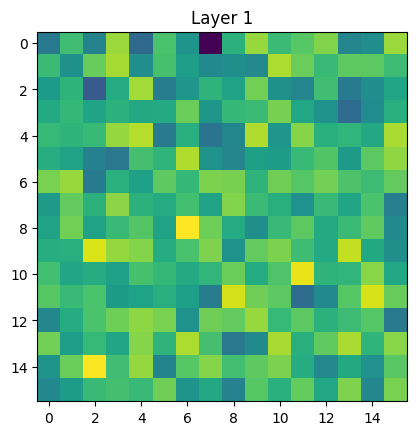

torch.Size([16, 16])


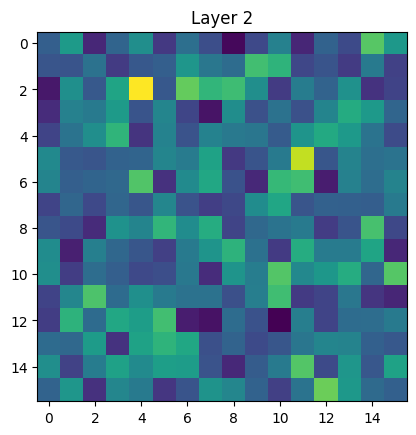

torch.Size([16, 16])


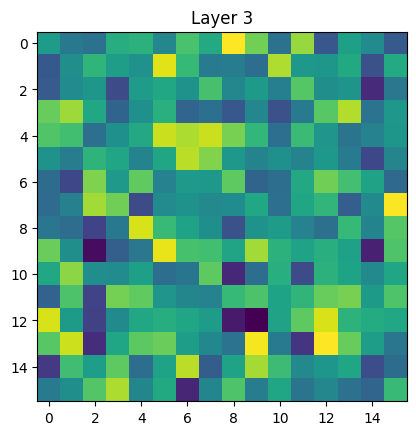

torch.Size([16, 16])


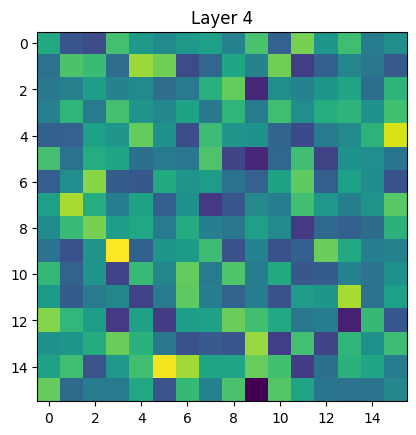

torch.Size([16, 16])


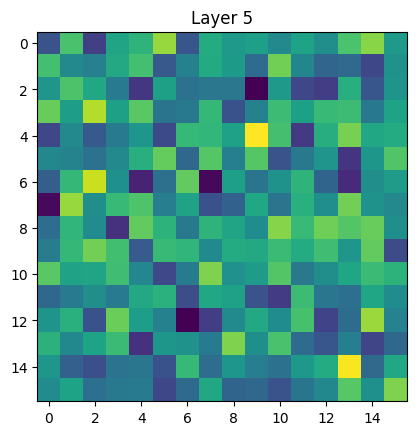

torch.Size([16, 16])


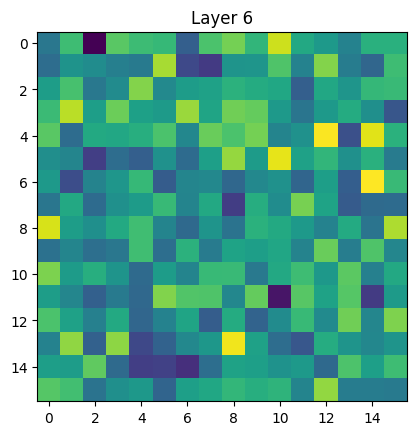

torch.Size([16, 16])


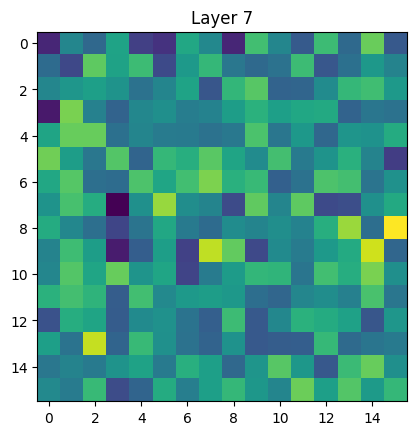

torch.Size([16, 16])


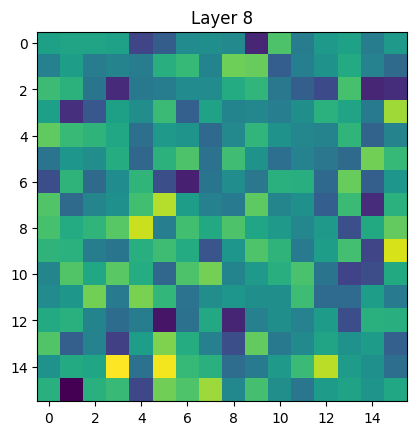

torch.Size([16, 16])


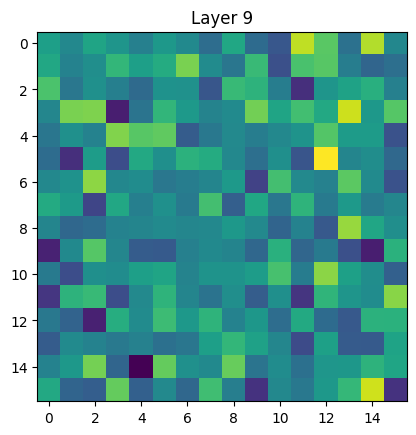

In [12]:
# If the object to iterate is a multivariate tensor, then it will iterate over the first dimension
# For instance, if we iterate over a tensor of size [10, 16, 16], it will produce 10 tensors of size [16,16]

mytensor = torch.randn(10, 16, 16)
for i, x in enumerate(mytensor):
    print(x.shape)
    plt.figure()
    plt.imshow(x)
    plt.title(f"Layer {i}")
    plt.show()

## Basic operations

In [13]:
x = torch.ones((1,5))
x.fill_(5)
y = torch.ones((1,5))
y.fill_(3)

# Addition, subtraction, multiplication, division, and power
print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x ** y)

tensor([[8., 8., 8., 8., 8.]])
tensor([[2., 2., 2., 2., 2.]])
tensor([[15., 15., 15., 15., 15.]])
tensor([[1.6667, 1.6667, 1.6667, 1.6667, 1.6667]])
tensor([[125., 125., 125., 125., 125.]])


In [14]:
# Pytorch has some built-in basic math functions (exp, sin, cos...) that can be applied element-wise to a tensor
x = torch.randn(2,3)
y = torch.exp(x)
print(x)
print(y)

tensor([[ 2.3741,  0.5962,  0.4694],
        [ 0.7239, -0.1282, -0.7033]])
tensor([[10.7412,  1.8152,  1.5991],
        [ 2.0625,  0.8797,  0.4950]])


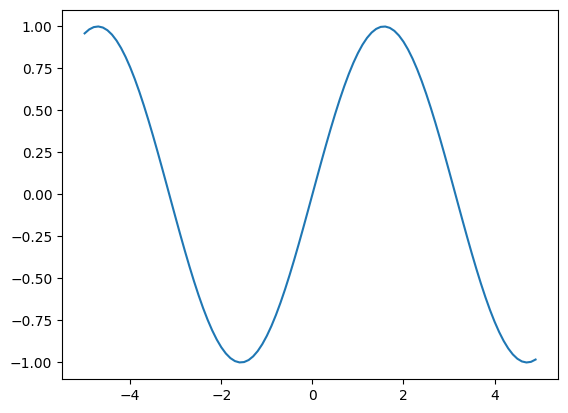

In [15]:
# TO DO: plot the function y=sin(x)
# - create a tensor x which ranges from -5 to 5 with a step increment of 0.1
x = torch.arange(-5, 5, 0.1)
# - compute y=sin(x) (use the torch.sin function)
y = torch.sin(x)
# - plot it using plt.plot(x, y)
plt.plot(x, y)


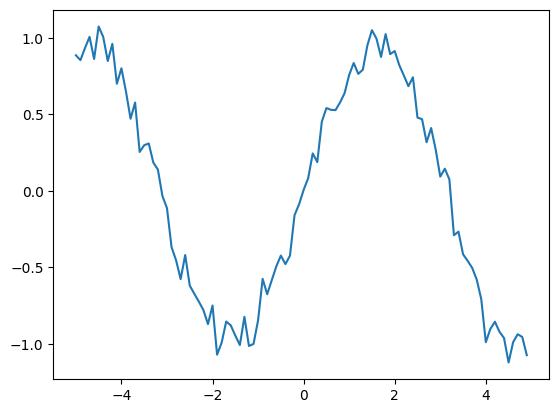

In [16]:
# TO DO: plot a noisy sinusoid
# - create a noise tensor called 'noise' with the same shape as y (use torch.randn_like)
noise = torch.randn_like(y)
# - create a scalar amount_noise which control the amount of noise (set it at 0.1 for instance)
amount_noise = 0.1
# - compute z, which is the sum of y and the noise tensor * the amount of noise
z = y + noise * amount_noise
# - plot z as a function of x
plt.plot(x, z)



In [17]:
# Slicing (same as in numpy)
x = torch.randn(5,6)
print(x[:3])  # slice over the first dimension
print(x[:, :3]) # slice over the second dimension
print(x[:3,:3]) # slice over both dimensions

tensor([[ 1.3688,  0.7615, -0.8162, -0.1991,  2.9570,  1.4296],
        [-0.4789,  0.7178,  1.5084, -1.6946,  1.4235,  1.1478],
        [-1.2849, -1.4375,  0.1578, -0.0708,  1.1471,  0.3773]])
tensor([[ 1.3688,  0.7615, -0.8162],
        [-0.4789,  0.7178,  1.5084],
        [-1.2849, -1.4375,  0.1578],
        [ 1.0001, -0.2893,  0.6283],
        [ 0.5396,  0.5189, -1.4436]])
tensor([[ 1.3688,  0.7615, -0.8162],
        [-0.4789,  0.7178,  1.5084],
        [-1.2849, -1.4375,  0.1578]])


In [18]:
# Useful functions are min, max, argmin and argmax
x = torch.rand(1, 5)
print(x)
print(x.min(), x.max(), x.argmin(), x.argmax())

# It's also easy to sort a tensor with ascending values
x_sorted, ind_sort = x.sort()
print(x_sorted, ind_sort)

tensor([[0.6796, 0.1563, 0.0154, 0.6109, 0.9386]])
tensor(0.0154) tensor(0.9386) tensor(2) tensor(4)
tensor([[0.0154, 0.1563, 0.6109, 0.6796, 0.9386]]) tensor([[2, 1, 3, 0, 4]])


tensor(-3.2500)
tensor(650)
tensor(2.5000)


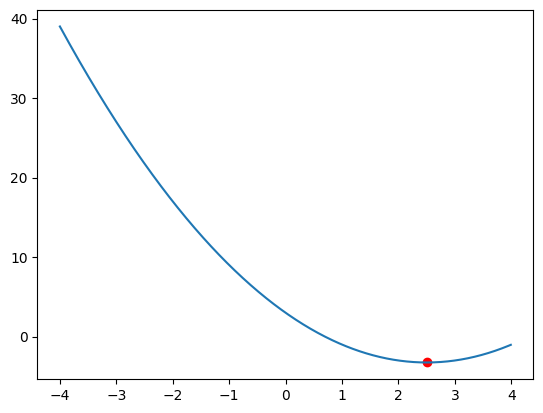

In [19]:
# TO DO: find the minimum of a quadratic function
# - create a tensor x which ranges from -4 to 4 with a step of 0.01
x = torch.arange(-4, 4, 0.01)
# - compute y = x^2 - 5x + 3
y = x**2 - 5*x + 3
# - plot y as a function of x
plt.plot(x, y)
# - compute the minimum value of y and print it
min_y = y.min()
print(min_y)
# - find the index 'min_ind' corresponding to this minimum (hint: use the 'argmin' function)
min_ind = y.argmin()
print(min_ind)
# - compute the value of x corresponding to the minimum: x[ind_min]
print(x[min_ind])
# - plot the minimum value on the graph (hint: use plt.scatter)
plt.scatter(x[min_ind], min_y, c='r')

## Tensor types

In Pytorch there are several data types, which are listed in the [documentation](https://pytorch.org/docs/stable/tensors.html).

In [20]:
x = torch.rand(1, 10)
print(x)

# Display the type using the 'dtype' attribute
# By default, it should be float32
print(x.dtype)

tensor([[0.3477, 0.7316, 0.3812, 0.3679, 0.9499, 0.9726, 0.8379, 0.1822, 0.5054,
         0.5182]])
torch.float32


In [21]:
# Change the type using the 'type' method
x = x.type(torch.float16)
print(x.dtype)

# Convert it to integer
x = x.type(torch.int16)
print(x.dtype)
print(x)

torch.float16
torch.int16
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int16)


In [22]:
# You can specify the type when creating a tensor
x = torch.tensor(3, dtype=torch.int)
print(x)

tensor(3, dtype=torch.int32)


In [23]:
# Check if it's a float
x = torch.tensor(3, dtype=torch.int)
print(x.is_floating_point())

pi = torch.tensor(3.14159)
print(pi, pi.is_floating_point(), pi.dtype)

False
tensor(3.1416) True torch.float32


## Reshaping

In [24]:
x = torch.randn(8,5)
print(x.shape)

# Transposition: use either 'x.t()' or 'x.transpose(dims)' where 'dims' specifies the new dimensions order
y = x.transpose(1,0)
print(y.shape)

z = x.t()
print(z.shape)

torch.Size([8, 5])
torch.Size([5, 8])
torch.Size([5, 8])


In [25]:
# Reshape: reorganize the tensor with the specified output dimensions (similar as 'numpy.reshape')
x = torch.randn(8,5)
y = x.reshape(10,4)
print(x.shape, y.shape)

# You can only specify one dimension and mark the other with '-1', and it will autocomplete consistently
z = x.reshape(-1, 10)
print(z.shape)
z = x.reshape(2, -1)
print(z.shape)


torch.Size([8, 5]) torch.Size([10, 4])
torch.Size([4, 10])
torch.Size([2, 20])


In [26]:
# View: similar as 'reshape', but only creates a view over the tensor: if the original data is changed, then the viewed tensors also changes
x = torch.zeros(8,5)
y = x.view(10,4)
print(y)

x.fill_(1)
print(y)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


## Squeeze and unsqueeze

It's important to understand that there is a difference between a tensor of shape `[a, b]` and a tensor of shape `[a, b, 1]`: even though the same data can be stored in both, the second one as an extra dimension (the third one) that can be useful, e.g., if you want to assemble tensors together in a bigger object.

For instance, an image with height `a` and width `b` can be seen as a 2D-tensor of shape `[a, b]`. But you can also view it as a single frame in a video, then it's a 3D-tensor of shape `[a, b, 1]`, and the whole video made up with `c` frames would be a 3D-tensor of shape `[a, b, c]`.

From a given tensor, you can add an extra dimension (with shape 1) using the `unsqueeze` method. Conversely, you can remove a dimension with shape 1 using the `squeeze` method.

In [27]:
# Example of squeeze: remove all dimensions with shape 1
x = torch.zeros(2, 1, 5, 1)
print(x.shape)
y = x.squeeze()
print(y.shape)

torch.Size([2, 1, 5, 1])
torch.Size([2, 5])


In [28]:
# Conversely, 'unsqueeze' allows you to expand a tensor by adding a new dimension, whose location must be specified
x = torch.zeros(2, 5)
print(x.shape)
y = x.unsqueeze(dim=0)
print(y.shape)
z = x.unsqueeze(dim=2)
print(z.shape)

torch.Size([2, 5])
torch.Size([1, 2, 5])
torch.Size([2, 5, 1])


## Assembling tensors

In [29]:
# Concatenate: useful to concatenate tensors along a specified (existing) dimension
# Works with any tensors, provided that the dimensions over which you don't concatenate are consistent
x1 = torch.rand(15, 64, 64)
x2 = torch.rand(50, 64, 64)
X_concat = torch.cat((x1,x2), dim=0)
print(X_concat.shape)

x1 = torch.rand(10, 217)
x2 = torch.rand(10, 489)
X_concat = torch.cat((x1,x2), dim=1)
print(X_concat.shape)

x1 = torch.rand(10, 217, 12)
x2 = torch.rand(10, 217, 14)
X_concat = torch.cat((x1,x2), dim=2)
print(X_concat.shape)

torch.Size([65, 64, 64])
torch.Size([10, 706])
torch.Size([10, 217, 26])


In [30]:
# TO DO :
# - create two tensors of shape 16x16 with random values.
x = torch.rand(16, 16)
y = torch.rand(16, 16)
# - concatenate them into a single tensor of size (2, 16, 16)
# hint: first 'unsqueeze' the tensors to create a new dimension, and then 'cat' over this dimension
z = torch.cat((x.unsqueeze(0), y.unsqueeze(0)), dim=0)
print(z.shape)

torch.Size([2, 16, 16])


In [31]:
# Stack: unlike 'cat', 'stack' concatenates the tensors along a new dimension (the inputs tensors must have the same shape)
x = torch.ones(3, 10)
y = torch.ones(3, 10)
print(x.shape, y.shape)

z_stack = torch.stack((x, y), dim=0)
print(z_stack.shape)

# Check the difference with 'cat'
z_cat = torch.cat((x, y), dim=0)
print(z_cat.shape)

torch.Size([3, 10]) torch.Size([3, 10])
torch.Size([2, 3, 10])
torch.Size([6, 10])


In [32]:
# It's possible to stack over any dimension, so it will create a tensor accordingly
z_stack = torch.stack((x, y), dim=1)
print(z_stack.shape)

z_stack = torch.stack((x, y), dim=2)
print(z_stack.shape)

torch.Size([3, 2, 10])
torch.Size([3, 10, 2])


In [33]:
# TO DO : same exercice as before but using stack (should be simpler)
z = torch.stack((x, y), dim=0)
print(z.shape)

torch.Size([2, 3, 10])


## Save and load files

In [34]:
# Reminder in numpy
x_np = np.ones((2,3))
np_filepath = 'x_np.npy'
np.save(np_filepath, x_np)
x_np_load = np.load(np_filepath)
print(x_np_load)

# In pytorch, it's very similar
x_tensor = torch.from_numpy(x_np)
tensor_filepath = 'x_tensor.pt'
torch.save(x_tensor, tensor_filepath)
x_tensor_load = torch.load(tensor_filepath)
print(x_tensor_load)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


## Devices

Finally, let's note that there are two types of *devices* in Pytorch: `cpu` and `cuda`. By default, every tensor's device is `cpu`, which means that all computation is performed on the CPU. However, when training big models and handling big datasets (as in deep learning), it's more convenient to use a graphic card (GPU) for the computation. To do that, we just need to tell Pytorch that the data / tensors / models should be copied on a `cuda` device.
This is mostly for your general knowledge: we won't use GPU computation in these labs.

**Note**: If you didn't install pytorch with CUDA, you should get an error if you try to copy a tensor to `cuda`. That's fine.

In [35]:
# You can check if a GPU is available (and how many)
print('Cuda available:', torch.cuda.is_available())
print('Number of GPUs:', torch.cuda.device_count())

# By default, any tensor will be on a 'cpu' device
x = torch.rand(1, 10)
print(x.device)

# You can change it using the 'to' method 
# Doing this is only possible if you have installed CUDA with Pytorch, so you might get an error here.
try:
    x = x.to('cuda')
    print(x.device)
except Exception as e:
    print(e)

Cuda available: False
Number of GPUs: 0
cpu
Torch not compiled with CUDA enabled
